<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

В первой ячейке импортируем библиотеки, так наглядно видно какие библиотеки используем в проекте.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Подгружаем данные и сохраняем в переменных. Защитимся от ошибки пути к файлам с помощью `try...except`.

In [3]:
try:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    df_train = pd.read_csv('gold_recovery_train_new.csv')
    df_test = pd.read_csv('gold_recovery_test_new.csv')
    df_full = pd.read_csv('gold_recovery_full_new.csv')

Сделаем краткий обзор данных.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


***Наименование признаков***

Наименование признаков следующее:

`[этап].[тип_параметра].[название_параметра]`

Пример: rougher.input.feed_ag

Значения для блока `[этап]`:
* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

Значения для блока `[тип_параметра]`:

* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

Названия столбцов соответствуют шаблону. Во многих столбцах всех таблиц есть пропуски. Типы данных соответствую содержимому за исключением одного - `date`. Пропуски в столбце отсутствуют, поэтому сразу приведём столбец `date` к типу datetime.

In [7]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%dT%H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%dT%H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%dT%H:%M:%S')

Проверим датасеты на наличие дубликатов.

In [8]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
df_test.duplicated().sum()

0
0


0

Дубликатов нет. 

Проверим корректность расчета параметра recovery по формуле.

![jupyter](https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg)

где:
* C — доля золота в концентрате после флотации - `rougher.output.concentrate_au`;
* F — доля золота в сырье/концентрате до флотации - `rougher.input.feed_au`;
* T — доля золота в отвальных хвостах после флотации - `rougher.output.tail_au`.

Запишем данные в константы.

In [9]:
C, F, T = (
    df_train['rougher.output.concentrate_au'], 
    df_train['rougher.input.feed_au'], 
    df_train['rougher.output.tail_au']
)

Рассчитаем recovery по формуле и сохраним результаты в новую переменную.

In [10]:
calc_recovery = C * (F - T) / (F * (C - T)) * 100

Посчитаем среднее абсолютное отклонение (MAE) табличного от расчётного.

In [11]:
mean_absolute_error(df_train['rougher.output.recovery'], calc_recovery)

9.73512347450521e-15

Отклонение достаточно мало, считаем что recovery рассчитано верно.

Количество столбцов тренировочной и тестовой выборки отличается. Получим список недостающих.

In [12]:
list(df_train.columns.difference(df_test.columns))

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Проанализировав список делаем вывод что отсутствующую часть признаков которые невозможно получить или измерить во время выполнения технологического процесса, для примера:

* параметры продукта получаемые в процессе обработки - final.output.concentrate, rougher.output.tail;
* расчётные параметры - rougher.calculation и final.output.recovery;
* целевые признаки - rougher.output.recovery, final.output.recovery;

Приступи к анализу пропусков

In [13]:
print(f'Пропуски в тестовой выборке: {df_test.isna().sum().sum()} что составляет {df_test.isna().mean().mean():.2%}')
print(f'Пропуски в обучающей выборке: {df_train.isna().sum().sum()} что составляет {df_train.isna().mean().mean():.2%}')
print(f'Пропуски в исходных данных: {df_full.isna().sum().sum()} что составляет {df_full.isna().mean().mean():.2%}')

Пропуски в тестовой выборке: 90 что составляет 0.03%
Пропуски в обучающей выборке: 4100 что составляет 0.33%
Пропуски в исходных данных: 4481 что составляет 0.26%


Меньше всего пропусков в тестовой выборке. Выведем столбцы с пропусками для более детального анализа.

In [14]:
df_train.isna().sum()

def show_nan(data):
    nan = data.isna().sum()
    res = (pd.concat([nan / data.shape[0], nan], axis=1,  keys=['percent', 'count'])
           .sort_values('percent', ascending=False))
    return res

show_nan(df_train).head(15)

,percent,count
secondary_cleaner.output.tail_sol,0.113436,1605
rougher.state.floatbank10_e_air,0.030815,436
rougher.input.floatbank11_xanthate,0.030249,428
primary_cleaner.output.concentrate_sol,0.020213,286
secondary_cleaner.state.floatbank2_a_air,0.015337,217
final.output.concentrate_sol,0.014913,211
rougher.input.feed_size,0.010177,144
primary_cleaner.input.xanthate,0.007068,100
rougher.input.feed_pb,0.007068,100
final.output.tail_pb,0.007068,100


In [15]:
show_nan(df_test).head(15)

,percent,count
rougher.input.floatbank11_xanthate,0.004726,25
rougher.input.feed_sol,0.003970,21
secondary_cleaner.state.floatbank3_a_air,0.001701,9
rougher.input.floatbank11_sulfate,0.001512,8
primary_cleaner.input.depressant,0.000945,5
rougher.input.floatbank10_sulfate,0.000945,5
primary_cleaner.input.xanthate,0.000756,4
primary_cleaner.input.sulfate,0.000756,4
rougher.input.feed_rate,0.000567,3
secondary_cleaner.state.floatbank2_a_air,0.000567,3


In [16]:
show_nan(df_full).head(15)

,percent,count
secondary_cleaner.output.tail_sol,0.089922,1748
rougher.input.floatbank11_xanthate,0.023304,453
rougher.state.floatbank10_e_air,0.022429,436
primary_cleaner.output.concentrate_sol,0.019034,370
secondary_cleaner.state.floatbank2_a_air,0.011317,220
final.output.concentrate_sol,0.010854,211
rougher.input.feed_size,0.007459,145
primary_cleaner.output.concentrate_pb,0.005967,116
primary_cleaner.input.xanthate,0.005350,104
final.output.tail_pb,0.005196,101


Пропуски в целевых признаках отсутствуют. Посмотрим на разброс значений.

In [17]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


Заполним пропуски с помощью `fillna()` указав метод `method='ffill'`. Так функция возьмёт предыдущее не пропущенное значение для заполнения пропуска.

In [18]:
for data in (df_train, df_test, df_full):
    data.replace(0, np.nan, inplace=True)
    data.fillna(method='ffill', inplace=True)
    print(f'Пропуски в выборке: {data.isna().sum().sum()}')

Пропуски в выборке: 0
Пропуски в выборке: 0
Пропуски в выборке: 0


In [19]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,...,1.943900e+04,19439.000000,1.943900e+04,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000
mean,5.192059,10.019346,9.469720,44.246399,67.379156,9.715543,2.703375,10.609227,3.051125,144.542451,...,1.898471e+01,-485.898569,1.501096e+01,-461.084281,15.694160,-488.685145,12.198011,-487.150508,18.958458,-505.441125
std,1.335128,1.531555,2.800491,4.222677,9.030714,2.260987,0.946068,2.805249,0.905978,44.593704,...,5.413202e+00,47.760684,4.888968e+00,67.408385,5.510983,34.532835,5.332969,38.346443,5.550514,37.694079
min,0.010000,0.010000,0.010000,0.010000,0.168611,0.016790,0.004508,0.077731,0.000777,0.003112,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.260080,9.149355,7.684075,43.412603,63.401708,8.068289,2.034818,8.943116,2.464175,114.051097,...,1.497540e+01,-500.705070,1.194033e+01,-500.187767,10.988528,-500.458573,8.971074,-500.129482,14.983005,-500.728189
50%,5.071432,10.107207,9.197703,45.014031,68.236161,9.746858,2.747000,10.623025,2.988057,143.205708,...,1.801732e+01,-499.837795,1.497099e+01,-499.459790,14.999920,-499.802639,11.019389,-499.935338,19.960511,-500.048424
75%,5.899913,11.038627,10.933719,46.276686,72.718333,11.135107,3.329501,12.104447,3.571563,175.035538,...,2.301246e+01,-498.249814,1.903411e+01,-400.118175,18.026184,-498.384191,14.019040,-499.437546,24.002617,-499.495403
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,3.011574e+01,-245.239184,3.126971e+01,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


После краткого обзора проверили отсутствие дубликатов, привели столбец "date" к верному формату. Сравнили тестовую выборку с тренировочной. Заполнили пропуски. Можем приступать к анализу.

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

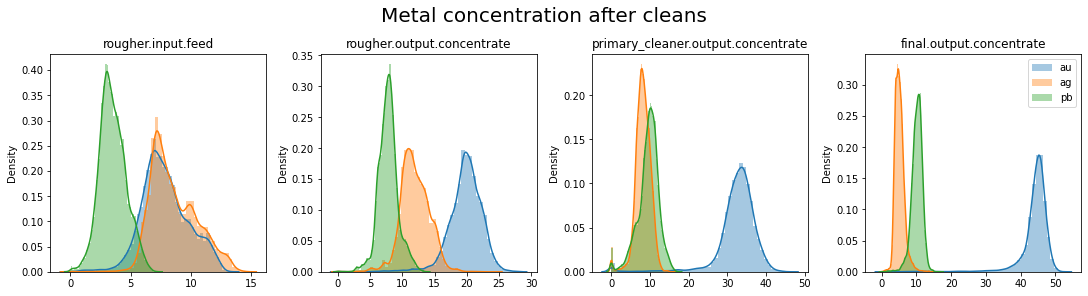

In [20]:
process = ['rougher.input.feed',
           'rougher.output.concentrate',
           'primary_cleaner.output.concentrate',
           'final.output.concentrate']

metals = ['au', 'ag', 'pb']

fig, axs = plt.subplots(1, len(process), figsize=(15, 4), constrained_layout=True)
fig.suptitle('Metal concentration after cleans', fontsize=20)

for stage, ax in zip(process, axs):
    ax.set_title(stage)
    for metal in metals:        
        cols = df_train.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(df_train.loc[:, cols].dropna(), label=metal, ax=ax)    
plt.legend()

plt.show()

На полученных графиках видно как концентрация золота значительно растет по мере прохождения технологического процесса. Вместе с ней растёт концентрация свинца.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

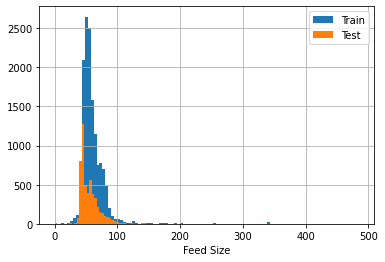

In [27]:
df_train['rougher.input.feed_size'].hist(bins=100, label='Train', )
df_test['rougher.input.feed_size'].hist(bins=100, label='Test')
plt.legend()

plt.xlabel('Feed Size')
plt.show()

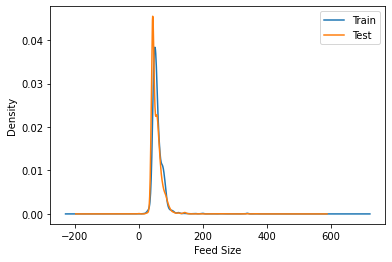

In [25]:
df_train['rougher.input.feed_size'].plot(kind='density', label='Train', )
df_test['rougher.input.feed_size'].plot(kind='density', label='Test')
plt.legend()

plt.xlabel('Feed Size')
plt.show()

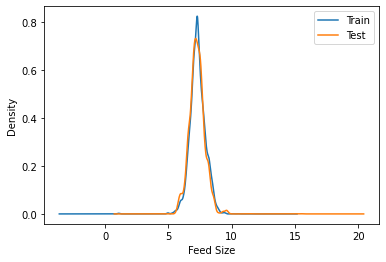

In [28]:
df_train['primary_cleaner.input.feed_size'].plot(kind='density', label='Train', )
df_test['primary_cleaner.input.feed_size'].plot(kind='density', label='Test')
plt.legend()

plt.xlabel('Feed Size')
plt.show()

Есть некоторые визуальные отличия. Они вызваны отличиями в размерах выборок. Считаем что данные достаточно похожи.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Для начала соберём данные в отдельную таблицу.

In [150]:
def sum_of_conc(row):
    stage = ['rougher', 'primary_cleaner', 'final']
    input_feed_au = row['rougher.input.feed_au']
    input_feed_ag = row['rougher.input.feed_ag']
    input_feed_pb = row['rougher.input.feed_pb']
    input_feed_sol = row['rougher.input.feed_sol']
    out_rougher = []
    out_primary_cleaner = []
    out_final = []
    list_of_arrays =[out_rougher, out_primary_cleaner, out_final]
    
    for step, array in zip(stage, list_of_arrays):
        array.append(row[step + '.output.concentrate_au'])
        array.append(row[step + '.output.concentrate_ag'])
        array.append(row[step + '.output.concentrate_pb'])
        array.append(row[step + '.output.concentrate_sol'])
        
    sum_before_steps = input_feed_ag + input_feed_au + input_feed_pb + input_feed_sol
    sum_rougher = sum(out_rougher)
    sum_primary = sum(out_primary_cleaner)
    sum_final = sum(out_final)
    
    return pd.Series([sum_before_steps, sum_rougher, sum_primary, sum_final])

In [151]:
sum_values = df_full.apply(sum_of_conc, axis = 1)
sum_values.columns = ["before_rougher","rougher","primary_cleaner","final"]

In [152]:
sum_values

,before_rougher,rougher,primary_cleaner,final
0,51.680034,66.424950,72.640924,63.644396
1,50.659114,67.012710,72.543485,63.957723
2,50.609929,66.103793,72.095042,64.311180
3,51.061546,65.752751,59.957723,63.573449
4,47.859163,65.908382,71.321010,64.004667
...,...,...,...,...
19434,53.415050,70.781325,59.001692,68.098589
19435,53.696482,70.539603,59.703912,68.274362
19436,54.589604,55.376330,59.561096,68.226068
19437,54.027355,69.201689,57.216686,68.200449


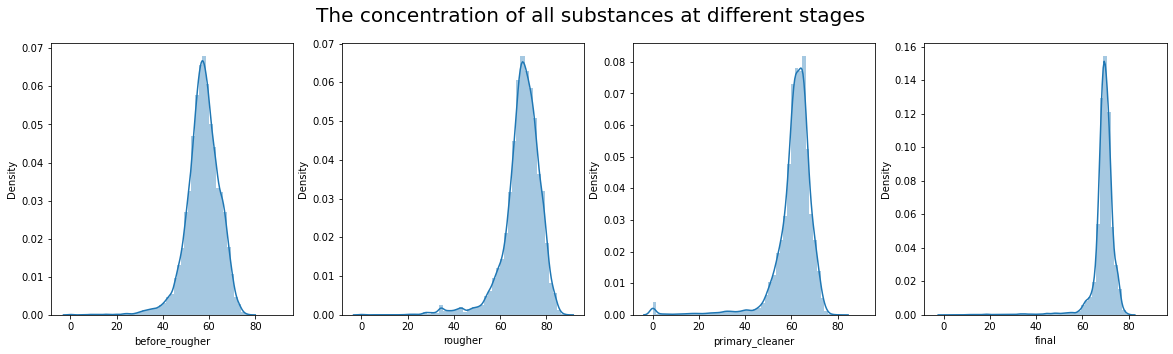

In [153]:
f, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True)
plt.suptitle('The concentration of all substances at different stages', fontsize=20)
sns.distplot(sum_values['before_rougher'], ax=axes[0])
sns.distplot(sum_values['rougher'], ax=axes[1])
sns.distplot(sum_values['primary_cleaner'], ax=axes[2])
sns.distplot(sum_values['final'], ax=axes[3])
plt.show()

На графиках видно как суммарная концентрация металлов увеличивается по мере обработки. Помимо основного пика видно "шум" в диапазоне от 0 - 40 ед. Возможно появление этих значений связано с неточностью измерений. Чем выше степень обработки, тем точнее измерения. Отфильтруем лишние значения.

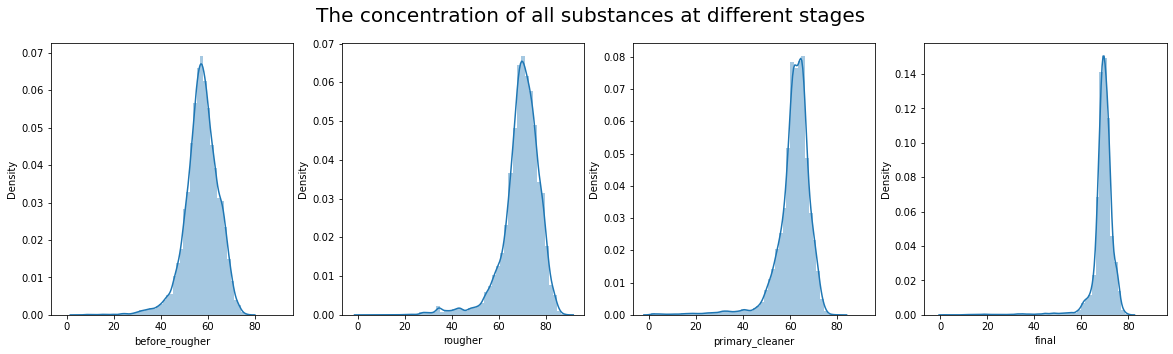

In [154]:
sum_values.query(
    'before_rougher >= 1 & rougher >= 1 & primary_cleaner >= 1 & final >= 1',
    inplace=True
)

f, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True)
plt.suptitle('The concentration of all substances at different stages', fontsize=20)
sns.distplot(sum_values['before_rougher'], ax=axes[0])
sns.distplot(sum_values['rougher'], ax=axes[1])
sns.distplot(sum_values['primary_cleaner'], ax=axes[2])
sns.distplot(sum_values['final'], ax=axes[3])
plt.show()

Собираем грязь и отпускаем чистое. Отличный результат, теперь его нужно применить на тестовый и тренировочный наборы данных.

In [155]:
columns_with_outliers_train = ['rougher.input.feed_au', 'rougher.input.feed_ag', 
                               'rougher.input.feed_pb', 'rougher.input.feed_sol',
                               'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 
                               'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
                               'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
                               'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',
                               'final.output.concentrate_au', 'final.output.concentrate_ag', 
                               'final.output.concentrate_pb', 'final.output.concentrate_sol']

columns_with_outliers_test = ['rougher.input.feed_au', 'rougher.input.feed_ag', 
                              'rougher.input.feed_pb', 'rougher.input.feed_sol']

for name_column in columns_with_outliers_train:
    df_train = df_train.drop(index = df_train[df_train[name_column] < 1].index,axis = 0)

for name_column in columns_with_outliers_test:
    df_test = df_test.drop(index = df_test[df_test[name_column] < 1].index,axis = 0)
    

df_test = df_test.drop(index = df_test[df_test["rougher.input.feed_au"] < 45].index,
                               axis = 0)
df_test = df_test.drop(index = df_test[df_test["rougher.input.feed_ag"] < 45].index,
                               axis = 0)
df_test = df_test.drop(index = df_test[df_test["rougher.input.feed_pb"] < 45].index,
                               axis = 0)
df_test = df_test.drop(index = df_test[df_test["rougher.input.feed_sol"] < 45].index,
                               axis = 0)

В ходе анализа мы наглядно показали как изменяется концентрация металлов от этапа к этапу. С каждой ступенью обработки концентрация металлов растёт. Сравнили как отличается размер гранул в тренировочной и тестовой выборках. В тестовой выборке меньше данных, поэтому есть визуальные отличия, но в целом значения похожи. Дальше посмотрели как суммарная концентрация металлов изменятся при этапах обработки. На этом этапе были обнаружены аномально низкие значения, которые были классифицированы как помехи и отфильтрованы из данных.

## Модель

Для решения задачи применим метрику качества — sMAPE «симметричное среднее абсолютное процентное отклонение». Она вычисляется по формуле:

![jupyter](https://pictures.s3.yandex.net/resources/smape_1576238825.jpg)

Запишем формулу в функцию.

In [156]:
def smape(true, pred):
    smape_error = np.mean(abs(true - pred) / ((abs(true) + abs(pred)) / 2)) * 100
    return smape_error

Нужно спрогнозировать сразу две величины:
    
* эффективность обогащения чернового концентрата `rougher.output.recovery`;
* эффективность обогащения финального концентрата `final.output.recovery`.

Итоговая метрика складывается из двух величин:

![jupyter](https://pictures.s3.yandex.net/resources/_smape_1576238814.jpg)

In [157]:
def final_smape(smape_rougher, smape_final):
    return (.25 * smape_rougher + .75 * smape_final)

Для обучения модели будем использовать метод `GridSearchCV`. Для оценки модели кросс-валидацией будем использовать sMAPE, для этого запишем метод для указания параметра. Чем меньше sMAPE, тем лучше, поэтому greater_is_better=False.

In [158]:
custom_score = make_scorer(smape, greater_is_better=False)

Перед обучением модели добавим в тестовую выборку недостающие столбцы методом `merge()`. После объединения удалим столбец date, он нам больше не понадобится.

In [159]:
test_frame_for_target = df_test.merge(df_full.loc[:,['date',"rougher.output.recovery","final.output.recovery"]],on = 'date')
df_test = test_frame_for_target.loc[:,df_test.columns]
df_test = df_test.drop('date', axis=1)

Выделим целевые признаки для расчёта sMAPE.

In [160]:
df_test_rougher = test_frame_for_target['rougher.output.recovery']
df_test_final = test_frame_for_target['final.output.recovery']

Отделим целевые признаки.

In [161]:
train_features_dataset_rougher = df_train.loc[:,df_test.columns]
train_target_dataset_rougher = df_train['rougher.output.recovery']

train_features_dataset_final = train_features_dataset_rougher 
train_target_dataset_final = df_train['final.output.recovery']

Будем сравнивать две модели: решающее дерево и случайный лес. Для расчёта используем построение конвейера с помощью функции make_pipeline.

In [162]:
model_RFR = make_pipeline(StandardScaler(), RandomForestRegressor())
model_DTR = make_pipeline(StandardScaler(), DecisionTreeRegressor())

Cоздадим словари, в которые вписываем параметры которые будет перебирать GridSearchCV в поисках лучшей модели.

In [167]:
params_RFR = {"randomforestregressor__n_estimators": [5, 50],
             "randomforestregressor__max_depth": [1, 10]}

params_DTR = {"decisiontreeregressor__max_depth": [1, 50]}

И записываем все данные в матрицу GridSearchCV.

In [168]:
grid_rougher_RFR = GridSearchCV(model_RFR, param_grid = params_RFR, scoring=custom_score)
grid_final_RFR = GridSearchCV(model_RFR, param_grid = params_RFR, scoring=custom_score)

grid_rougher_DTR = GridSearchCV(model_DTR, param_grid = params_DTR, scoring=custom_score)
grid_final_DTR = GridSearchCV(model_DTR, param_grid = params_DTR, scoring=custom_score)

Теперь всё готово для обучения модели.

In [169]:
%%time

grid_rougher_RFR.fit(train_features_dataset_rougher, train_target_dataset_rougher)
grid_final_RFR.fit(train_features_dataset_final, train_target_dataset_final)

grid_rougher_DTR.fit(train_features_dataset_rougher, train_target_dataset_rougher)
grid_final_DTR.fit(train_features_dataset_final, train_target_dataset_final)

CPU times: user 3min 37s, sys: 1.11 s, total: 3min 38s
Wall time: 3min 39s


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [1, 50]},
             scoring=make_scorer(smape, greater_is_better=False))

Модели обучены, ошибок нет, посмотрим на полученные результаты.

In [170]:
print("Лучшие параметры моделей")
print(grid_rougher_RFR.best_estimator_)
print(grid_final_RFR.best_estimator_)
print(grid_rougher_DTR.best_estimator_)
print(grid_final_DTR.best_estimator_)

Лучшие параметры моделей
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, n_estimators=50))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, n_estimators=50))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])


Выведем значения sMAPE для каждой модели.

In [171]:
best_score_rougher_RFR = grid_rougher_RFR.best_score_
best_score_final_RFR = grid_final_RFR.best_score_
best_score_rougher_DTR = grid_rougher_DTR.best_score_
best_score_final_DTR = grid_final_DTR.best_score_

print('sMAPE моделей при обучении:')
print("rougher")
print("RandomForest ", best_score_rougher_RFR)
print("DecisionTree ", best_score_rougher_DTR)
print()
print("final")
print("RandomForest ",best_score_final_RFR)
print("DecisionTree ",best_score_final_DTR)

sMAPE моделей при обучении:
rougher
RandomForest  -6.974507480695882
DecisionTree  -7.823989980358803

final
RandomForest  -9.204937622266687
DecisionTree  -9.626796951029238


Случайный лес показал результат лучше. Одно дерево хорошо, а целый лес предсказывает точнее. Проверим результаты на итоговом sMAPE.

In [172]:
print('финальный sMAPE моделей:')
print("rougher")
print("RandomForest ", final_smape(best_score_rougher_RFR, best_score_final_RFR))
print("DecisionTree ", final_smape(best_score_rougher_DTR, best_score_final_DTR))

финальный sMAPE моделей:
rougher
RandomForest  -8.647330086873986
DecisionTree  -9.17609520836163


Кажется у нас есть победитель - лес. Посмотри на что он способен, протестируем модель на тестовой выборке.

In [174]:
rogher_test = grid_rougher_RFR.predict(df_test)
final_test = grid_final_RFR.predict(df_test)

print(
    "sMAPE на тестовой выборке ",
    final_smape(smape(df_test_rougher, rogher_test), 
                smape(df_test_final, final_test))
)


sMAPE на тестовой выборке  7.489997543956324


In [178]:
neighbors_clf = KNeighborsRegressor()
neighbors_clf_final = KNeighborsRegressor()

neighbors_clf.fit(train_features_dataset_rougher, train_target_dataset_rougher)
neighbors_clf_final.fit(train_features_dataset_final, train_target_dataset_final)

base_rougher = neighbors_clf.predict(df_test)
base_final_pred = neighbors_clf_final.predict(df_test)

print(
    "sMAPE константной модели ", 
    final_smape(smape(df_test_rougher, base_rougher),
                smape(df_test_final, base_final_pred))
)



sMAPE константной модели  9.693742186444261


Целью проект является подготовка прототипа модели машинного обучения для компании, которая разрабатывает решения для эффективной работы промышленных предприятий. На входе нам даны три выборки, две из которых тренировочная и тестовая. Был проведём краткий обзор данных, поиск и заполнение пропусков. Для заполнения пропусков был выбран метод `fillna()` с параметром ffill, в результате чего пропуски были заполнены предыдущем значением.

На этапе анализа данных была рассмотрены изменения концентрации металлов на каждом этапе. Оценены суммарные изменения. Выделены значения, которые были определены как помехи и отброшены из данных. Так же было произведено сравнение размеров гранул золота тренировочной и тестовой выборки.

На этапе подготовки модели, тестовая выборка была дополнена недостающими данными. Формулы для расчёта абсолютного процентного отклонения записаны в функции для удобства дальнейших расчётов при сравнении моделей. Подготовлены параметры для обучения моделей и, собственно, само обучении. На сравнении две модели. Лучшие результаты показала модель случайного леса сделав более точные предсказания согласно расчёту отклонения. В результате модель сделала прогноз для тестовой выборки. Для проверки адекватности модели была выбрана модель - ближайших соседей. Сравнив результаты с результатами случайной модели, делаем вывод что модель адекватна.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке